### Previously reported dependency parsing performances for Estonian and English

Sources:

* Stanford @ CoNLL 2017 Shared Task: https://universaldependencies.org/conll17/results-las.html
* HIT-SCIR, StanfordNLP & UDPipe 1.2 @ CoNLL 2018 Shared Task: https://universaldependencies.org/conll18/results-las.html
* Stanza version 1.0: https://stanfordnlp.github.io/stanza/v100performance.html
* Stanza version 1.3: https://stanfordnlp.github.io/stanza/performance.html 
* UDPipe 2: https://ufal.mff.cuni.cz/udpipe/2/models 
* Udify: https://arxiv.org/pdf/1904.02099.pdf
* RobertNLP @ IWPT 2021 Shared Task: https://universaldependencies.org/iwpt21/results_official_fine.html ; https://aclanthology.org/2021.iwpt-1.21.pdf

* Corpus sizes:
    * Estonian:
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.0/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.2/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.5/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.7/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EWT/blob/r2.7/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.8/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.10/stats.xml
    * English:
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.0/stats.xml
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.2/stats.xml
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.5/stats.xml
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.7/stats.xml
        * https://github.com/UniversalDependencies/UD_English-GUM/blob/r2.7/stats.xml
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.6/stats.xml
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.10/stats.xml

(last checked: 2023-06-14)

In [1]:
#!pip install adjustText

In [2]:
from plotnine import ggplot, geom_point, aes, geom_line, geom_text
from plotnine import geom_abline, geom_hline, ggtitle, theme, xlab, labs
from plotnine import scale_color_manual, element_line, element_text, theme_bw
from plotnine import facet_wrap
import pandas as pd

In [3]:
data = {
'ud_version':    [2.0, 2.2, 2.2, 2.5, 2.8, 2.2, 2.2, 2.10, 2.3, 2.7]+\
                 [2.0, 2.2, 2.2, 2.5, 2.8, 2.2, 2.2, 2.10, 2.3, 2.7],
# exact corpus size (in words)
'exact_corpus_size':
                 [34628, 366351, 366351, 437769, 437767, 366351, 366351, 437850, 12032309, 437769+56399]+\
                 [229753, 254829, 254829, 254829, 254830, 254829, 254829, 254821, 12032309, 254829+113385], 
# total corpus size (in thousands of words)
'corpus_size':   [ 34, 366, 366, 437, 437, 366, 366, 437, 12032, 437+56]+\
                 [229, 254, 254, 254, 254, 254, 254, 254, 12032, 254+113], 
'LAS': [71.65, 85.35, 83.84, 83.82, 84.43, 75.02, 83.26, 86.16, 86.67, 89.52]+\
       [82.23, 84.57, 83.87, 83.59, 84.91, 77.56, 82.51, 88.10, 88.50, 90.27],
'parser': ['Stanford', 'HIT-SCIR', 'StanfordNLP', 'Stanza v1.0', 'Stanza v1.3', 'UDPipe 1.2', 'UDPipe 2 prototype', 'UDPipe 2', 'Udify v1.0', 'RobertNLP']+\
          ['Stanford', 'HIT-SCIR', 'StanfordNLP', 'Stanza v1.0', 'Stanza v1.3', 'UDPipe 1.2', 'UDPipe 2 prototype', 'UDPipe 2', 'Udify v1.0', 'RobertNLP'],
# corpus name
'corpus': ['et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt']+\
          ['en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt'],
'year':   [2017, 2018, 2018, 2020, 2021, 2018, 2018, 2022, 2019, 2021]+\
          [2017, 2018, 2018, 2020, 2021, 2018, 2018, 2022, 2019, 2021],
}
results = pd.DataFrame.from_dict(data)
results

,ud_version,exact_corpus_size,corpus_size,LAS,parser,corpus,year
0,2.0,34628,34,71.65,Stanford,et_edt,2017
1,2.2,366351,366,85.35,HIT-SCIR,et_edt,2018
2,2.2,366351,366,83.84,StanfordNLP,et_edt,2018
3,2.5,437769,437,83.82,Stanza v1.0,et_edt,2020
4,2.8,437767,437,84.43,Stanza v1.3,et_edt,2021
5,2.2,366351,366,75.02,UDPipe 1.2,et_edt,2018
6,2.2,366351,366,83.26,UDPipe 2 prototype,et_edt,2018
7,2.1,437850,437,86.16,UDPipe 2,et_edt,2022
8,2.3,12032309,12032,86.67,Udify v1.0,et_edt,2019
9,2.7,494168,493,89.52,RobertNLP,et_edt,2021


In [4]:
import math

# Calculates Hoeffding's bound. 
# Parameters:
# n -- evaluation set size in words
# alpha -- confidence level is (1 - alpha)
def hoeffding_bounds(n, alpha=0.05):
    return math.sqrt( (1/(2*n)*math.log(2/(alpha))) )

# Add Hoeffding bounds confidence intervals to each LAS in table
def add_hoeffding_bound_conf_intervals(dframe, test_proportion=0.1):
    # Initialize new columns
    dframe['LAS_lower'] = [0.0]*len(dframe)
    dframe['LAS_upper'] = [0.0]*len(dframe)
    # Calculate conf intervals for each LAS
    for ind in dframe.index:
        LAS = dframe['LAS'][ind]
        corpus_size = dframe['exact_corpus_size'][ind]
        test_corpus_size = corpus_size*test_proportion
        hfb = hoeffding_bounds(test_corpus_size) * 100.0
        dframe.loc[ind,'LAS_lower'] = round(LAS - hfb, 2)
        dframe.loc[ind,'LAS_upper'] = round(LAS + hfb, 2)
    return dframe

add_hoeffding_bound_conf_intervals(results)

,ud_version,exact_corpus_size,corpus_size,LAS,parser,corpus,year,LAS_lower,LAS_upper
0,2.0,34628,34,71.65,Stanford,et_edt,2017,69.34,73.96
1,2.2,366351,366,85.35,HIT-SCIR,et_edt,2018,84.64,86.06
2,2.2,366351,366,83.84,StanfordNLP,et_edt,2018,83.13,84.55
3,2.5,437769,437,83.82,Stanza v1.0,et_edt,2020,83.17,84.47
4,2.8,437767,437,84.43,Stanza v1.3,et_edt,2021,83.78,85.08
5,2.2,366351,366,75.02,UDPipe 1.2,et_edt,2018,74.31,75.73
6,2.2,366351,366,83.26,UDPipe 2 prototype,et_edt,2018,82.55,83.97
7,2.1,437850,437,86.16,UDPipe 2,et_edt,2022,85.51,86.81
8,2.3,12032309,12032,86.67,Udify v1.0,et_edt,2019,86.55,86.79
9,2.7,494168,493,89.52,RobertNLP,et_edt,2021,88.91,90.13


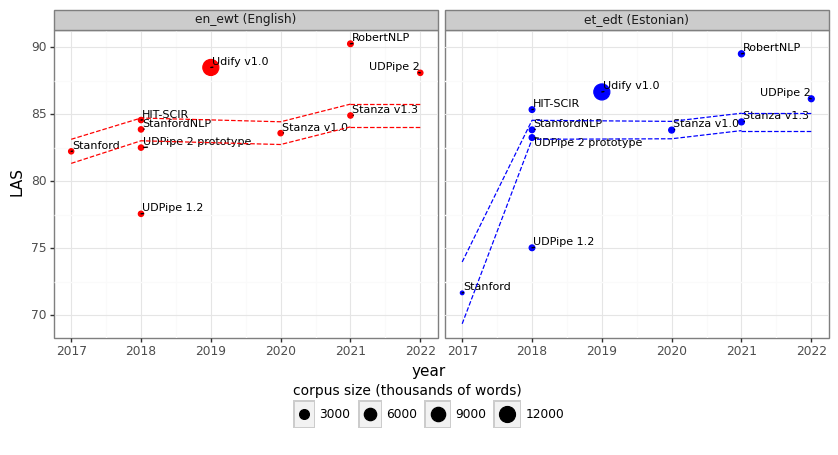

<ggplot: (131989585493)>

In [5]:
p = ggplot(results) + theme_bw()
p = p + theme(legend_title=element_text(size=10), figure_size=(10, 4),)
p = p + facet_wrap(['corpus'], nrow = 1, labeller={'et_edt':'et_edt (Estonian)', 'en_ewt':'en_ewt (English)'})
p = p + geom_point(aes(x='year', y='LAS', color='corpus', size='corpus_size'), show_legend={'size': True})
p = p + geom_text(aes(x='year', y='LAS', label="parser"), data=results[results['corpus']=='et_edt'], size=8, 
                  adjust_text={'arrowprops': {'arrowstyle': '-'}} )
p = p + geom_text(aes(x='year', y='LAS', label="parser"), data=results[results['corpus']=='en_ewt'], size=8, 
                  adjust_text={'arrowprops': {'arrowstyle': '-'}} )
# Stanza's 95% conf intervals on EN
p = p + geom_line(aes(x='year', y='LAS_upper'), 
                  data=results[(results['corpus']=='en_ewt') & results['parser'].str.contains('Stan')], 
                  linetype='dashed', color='red')
p = p + geom_line(aes(x='year', y='LAS_lower'), 
                  data=results[(results['corpus']=='en_ewt') & results['parser'].str.contains('Stan')], 
                  linetype='dashed', color='red')
# Stanza's 95% conf intervals on ET
p = p + geom_line(aes(x='year', y='LAS_upper'), 
                  data=results[(results['corpus']=='et_edt') & results['parser'].str.contains('Stan')], 
                  linetype='dashed', color='blue')
p = p + geom_line(aes(x='year', y='LAS_lower'), 
                  data=results[(results['corpus']=='et_edt') & results['parser'].str.contains('Stan')], 
                  linetype='dashed', color='blue')
# Complete conf interval lines (extend from 2021 to 2022)
last_en_ewt_stanza = \
    (results[(results['corpus']=='en_ewt') & results['parser'].str.contains('Stan')].tail(1)).copy()
last_en_ewt_stanza = pd.concat([last_en_ewt_stanza, last_en_ewt_stanza], ignore_index=True)
last_en_ewt_stanza.loc[1, 'year'] = 2022
last_et_edt_stanza = \
    (results[(results['corpus']=='et_edt') & results['parser'].str.contains('Stan')].tail(1)).copy()
last_et_edt_stanza = pd.concat([last_et_edt_stanza, last_et_edt_stanza], ignore_index=True)
last_et_edt_stanza.loc[1, 'year'] = 2022
p = p + geom_line(aes(x='year', y='LAS_upper'), 
                  data=last_en_ewt_stanza, 
                  linetype='dashed', color='red')
p = p + geom_line(aes(x='year', y='LAS_lower'), 
                  data=last_en_ewt_stanza, 
                  linetype='dashed', color='red')
p = p + geom_line(aes(x='year', y='LAS_upper'), 
                  data=last_et_edt_stanza, 
                  linetype='dashed', color='blue')
p = p + geom_line(aes(x='year', y='LAS_lower'), 
                  data=last_et_edt_stanza, 
                  linetype='dashed', color='blue')
# Override default colors
p = p + scale_color_manual(values = {'et_edt': 'blue', 'en_ewt': 'red'}, guide=False)
# Override labels
p = p + labs(size = "corpus size (thousands of words)")
p = p + theme(legend_position='bottom', legend_box_spacing=0.25)
display(p)

In [6]:
p.save('figure_reported_las_vs_years.pdf')

C:\Programmid\Miniconda3\envs\py38_estnltk_neural\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 10 x 4 in image.
C:\Programmid\Miniconda3\envs\py38_estnltk_neural\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: figure_reported_las_vs_years.pdf
